In [1]:
# #import functions
# from sklearn.model_selection import train_test_split, KFold
# from sklearn.linear_model import LinearRegression 
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import PolynomialFeatures
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from numpy import mean
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
# import sklearn.metrics as metrics
# from sklearn.linear_model import LassoCV
# from sklearn.linear_model import Lasso
# from sklearn.svm import SVR
# from sklearn.model_selection import RepeatedKFold
# import xgboost as xg
# from numpy import arange
# from sklearn.model_selection import cross_validate, ShuffleSplit, cross_val_score, GridSearchCV
# import warnings # supress warnings
# warnings.filterwarnings('ignore')
# import time

#import functions
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import mean
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold
import xgboost as xg
from numpy import arange
from sklearn.model_selection import cross_validate, ShuffleSplit, cross_val_score, GridSearchCV
import warnings # supress warnings
warnings.filterwarnings('ignore')
import time

In [2]:
# Load data
housing_price = pd.read_csv('daft_data.csv')
housing_price

,Price,Dublin 1,Dublin 2,Dublin 3,Dublin 4,Dublin 5,Dublin 6,Dublin 6W,Dublin 7,Dublin 8,...,House,Studio,Bedroom,Bathroom,Furnished,Transports,Shops,Parking,Internet,ExtraSpace
0,1900,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,1,1,1
1,2250,0,0,0,0,0,0,0,0,0,...,0,0,2,2,0,1,0,1,1,1
2,3045,0,0,0,0,0,0,0,0,0,...,0,0,3,3,1,1,0,1,1,1
3,3300,0,1,0,0,0,0,0,0,0,...,0,0,2,2,1,0,0,1,1,1
4,4200,0,1,0,0,0,0,0,0,0,...,0,0,2,2,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1875,0,0,1,0,0,0,0,0,0,...,1,0,1,1,1,0,0,1,1,1
743,2500,0,0,0,1,0,0,0,0,0,...,0,0,1,1,1,0,0,0,1,0
744,1600,0,0,1,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,1,1
745,1935,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,0,0,1,1,0


In [3]:
# Splitting the features and target
X = housing_price.iloc[:,1:] # feature
y = housing_price.iloc[:,0]  # target (price)

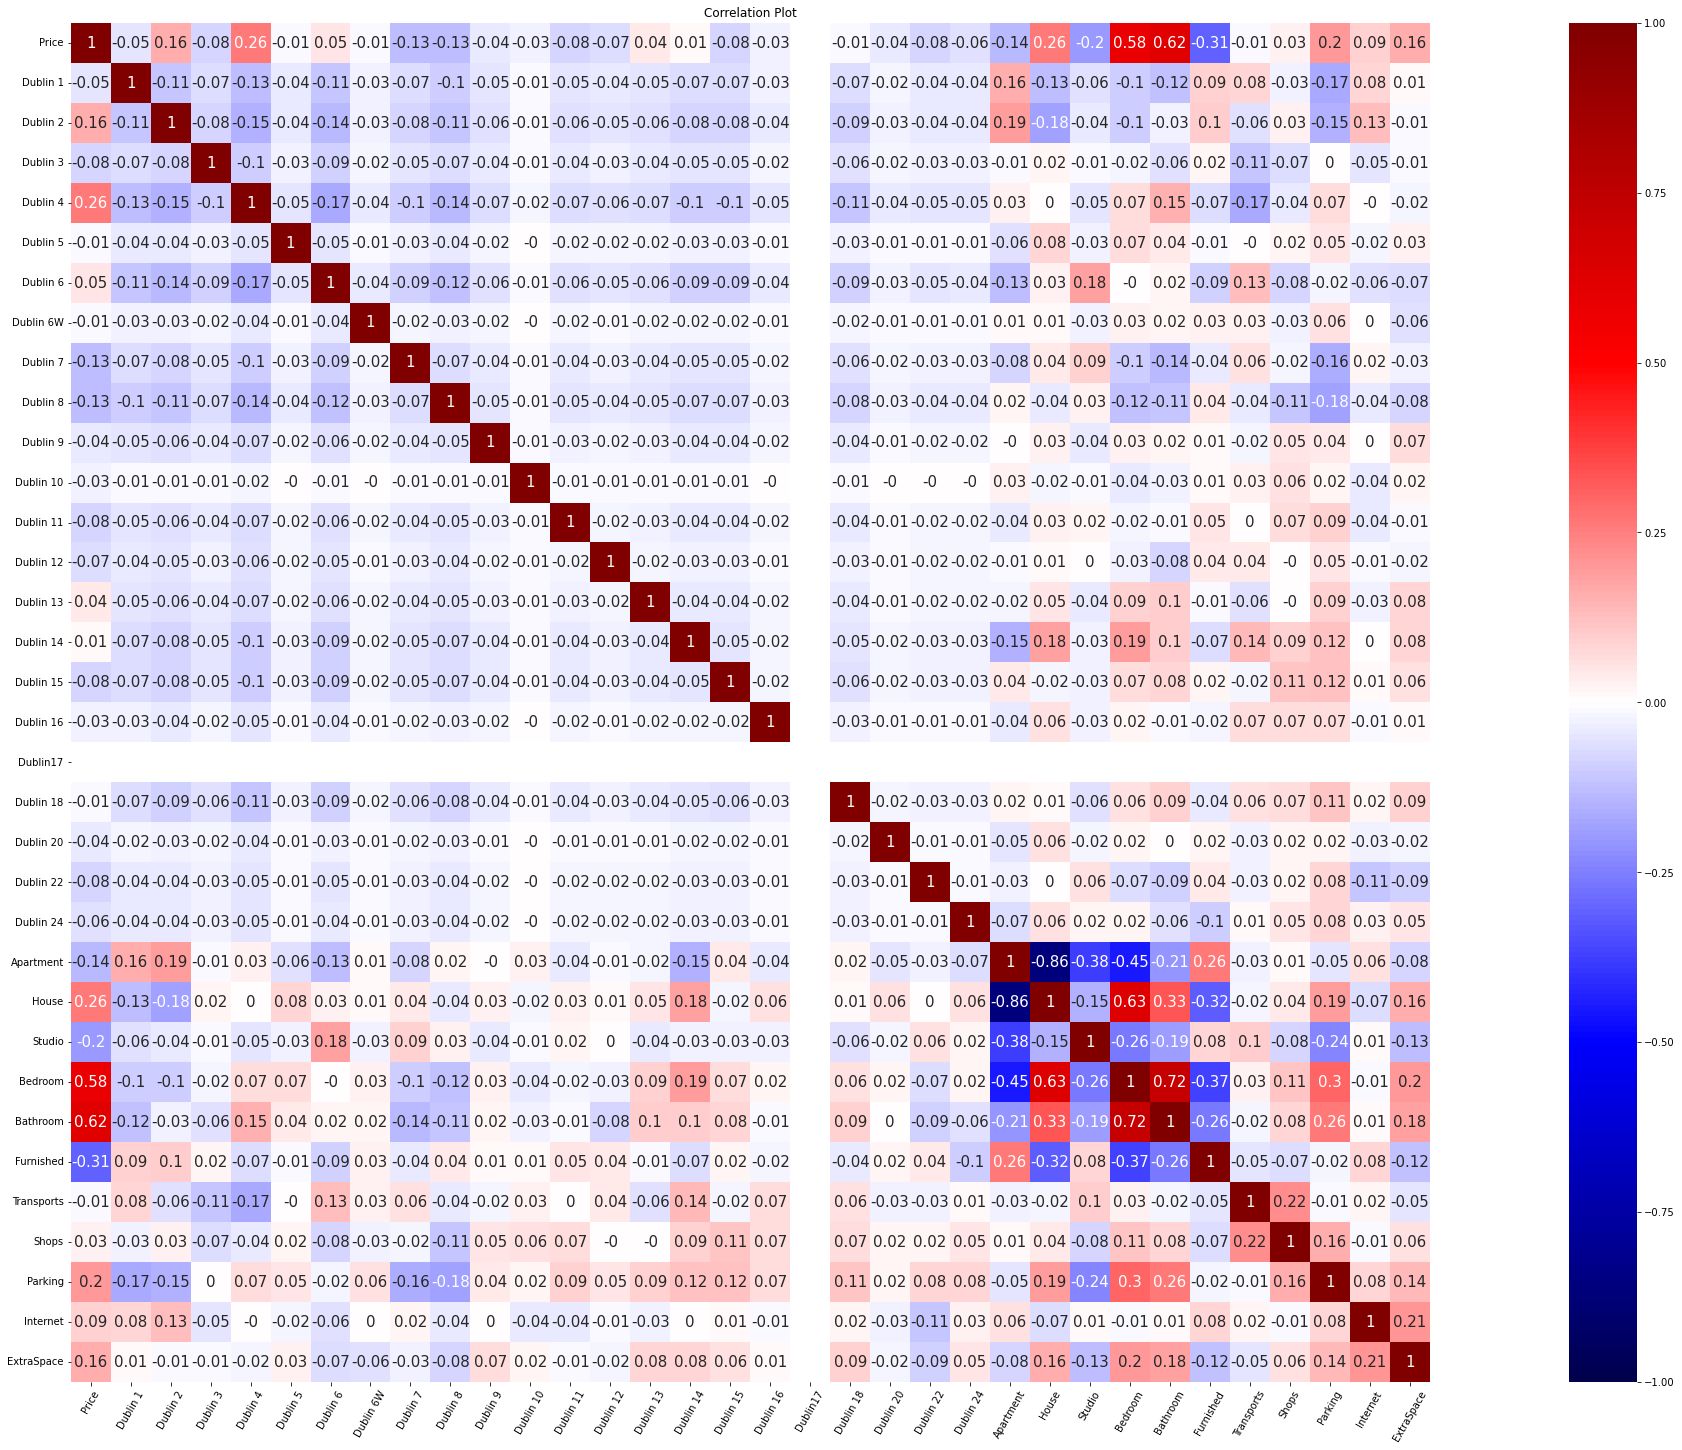

In [4]:
# Correlation plot
fig, ax = plt.subplots(figsize = (50,25))
sns.heatmap(housing_price.corr().round(2), vmin=-1, vmax=1, center=0, annot = True, annot_kws = {'size':15},square=True,
cmap='seismic')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)
plt.title("Correlation Plot")
plt.show()

In [5]:
# Train test data split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 123)

Linear regression model
MAE:   610.4697986577181
MSE:   769347.7046979866
RMSE:   877.1246802467632
Difference (y_true - y_prediction):  610.4697986577181 ± 629.8208710615993


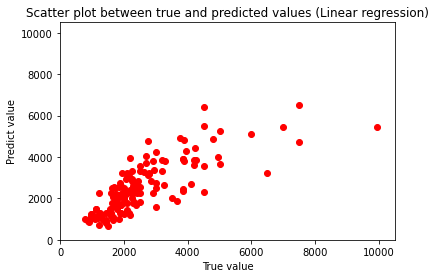

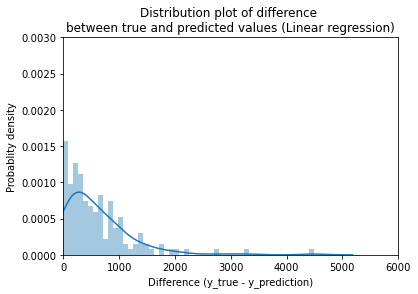




 The following graphs are for report (no title)


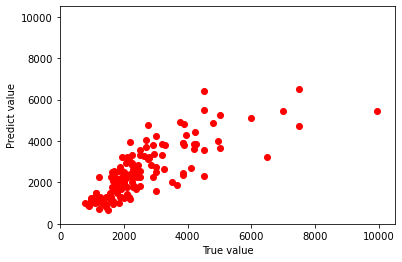

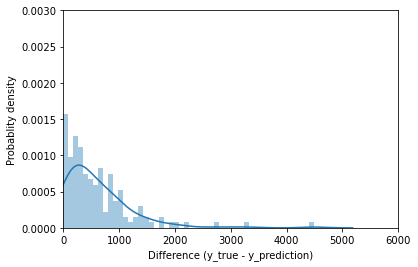

In [6]:
# Train linear regression model

model = LinearRegression()
model.fit(x_train, y_train)
ypred = model.predict(x_test)
ytest = np.array(y_test)

# Sometimes, the model predicts ridiculous number for some data
# Therefore, delete those wired predictions and then evaluate the result
wired_pred_index = []
for i, pred in enumerate(ypred):
    if pred > 50000 or pred < -10000:
        wired_pred_index.append(i)
ypred = np.delete(ypred, wired_pred_index) # delete wired prediction
ytest = np.delete(ytest, wired_pred_index) # delete the corresponding data from test set

# Compute MAE
absolute = np.absolute(ytest - ypred)
mae = np.average(absolute)

# Compute MSE and RMSE
square = (ytest - ypred) ** 2
mse = np.average(square)
rmse = np.sqrt(mse)


# Print results
print("=======================================")
print("Linear regression model")
print("=======================================")
print("MAE:  ", mae)
print("MSE:  ", mse)
print("RMSE:  ", rmse)

dif = np.absolute(ytest - ypred)
dif_ave = np.average(dif)
dif_std = np.std(dif)
print("Difference (y_true - y_prediction): ", dif_ave, u"\u00B1", dif_std)



# Plot graph
plt.figure(figsize = (6, 4))
plt.scatter(ytest, ypred,  color='red')
plt.title('Scatter plot between true and predicted values (Linear regression)')
plt.xlabel("True value")
plt.ylabel("Predict value")
plt.xlim([0, 10500])
plt.ylim([0, 10500])
plt.show()

plt.figure(figsize = (6, 4))
sns.distplot(dif, bins=50)
plt.title('Distribution plot of difference \nbetween true and predicted values (Linear regression)')
plt.xlabel("Difference (y_true - y_prediction)")
plt.ylabel("Probablity density")
plt.xlim([0, 6000])
plt.ylim([0, 0.003])
plt.show()

print("\n\n\n The following graphs are for report (no title)")

plt.figure(figsize = (6, 4))
plt.scatter(ytest, ypred,  color='red')
plt.xlabel("True value")
plt.ylabel("Predict value")
plt.xlim([0, 10500])
plt.ylim([0, 10500])
plt.show()

plt.figure(figsize = (6, 4))
sns.distplot(dif, bins=50)
plt.xlabel("Difference (y_true - y_prediction)")
plt.ylabel("Probablity density")
plt.xlim([0, 6000])
plt.ylim([0, 0.003])
plt.show()


Alpha:  0.0001 mean MAE:  680.5476342640313 std MAE:  61.390300865450236
Alpha:  0.001 mean MAE:  680.5422227663635 std MAE:  61.39127173328672
Alpha:  0.01 mean MAE:  680.4866083121881 std MAE:  61.39143898266293
Alpha:  0.1 mean MAE:  679.9544804997795 std MAE:  61.397804765812104
Alpha:  1 mean MAE:  675.0349918820698 std MAE:  61.17218233743608
Alpha:  10 mean MAE:  657.4916895428609 std MAE:  68.82980878333515
Alpha:  20 mean MAE:  654.7188531439075 std MAE:  82.50494798701888
Alpha:  30 mean MAE:  661.2975550524338 std MAE:  93.30339489970613
Alpha:  40 mean MAE:  664.2955274224549 std MAE:  98.0532228248273


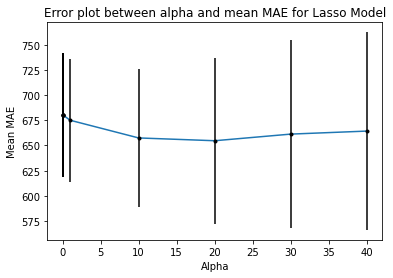




 The following graphs are for report (no title)


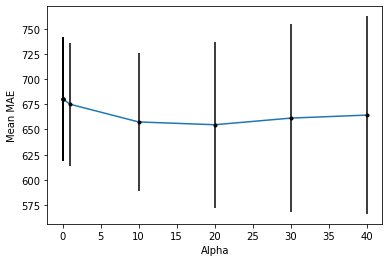

In [7]:
# Train Lasso Model

# Decide the range of alphas we are going to test
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30, 40]

# Prepare list to save the errors
mean_mae=[]
std_mae=[]

# Find the best alpha useing cross-validation
folds = KFold(n_splits =8)
for a in alphas:
    temp_mae = []
    for train,test in folds.split(x_train):

        # change the type of the training data, otherwise some problems will happen
        temp_xtrain = np.array(x_train)
        temp_ytrain = np.array(y_train)
        
        # Train the model
        model = Lasso(alpha = a)
        model.fit(temp_xtrain[train], temp_ytrain[train])
        ypred = model.predict(temp_xtrain[test])
        ytest = np.array(temp_ytrain[test])
        
        # Sometimes, the model predicts ridiculous number for some data
        # Therefore, delete those wired predictions and then evaluate the result
        wired_pred_index = []
        for i, pred in enumerate(ypred):
            if pred > 50000 or pred < -10000:
                wired_pred_index.append(i)
        ypred = np.delete(ypred, wired_pred_index) # delete wired prediction
        ytest = np.delete(ytest, wired_pred_index) # delete the corresponding data from test set
        
        # Compute MAE
        absolute = np.absolute(ytest - ypred)
        mae = np.average(absolute)
        temp_mae.append(mae)
    
    # Record the result of an alpha
    mean_mae.append(np.array(temp_mae).mean())
    std_mae.append(np.array(temp_mae).std())

# Print the mean of RMSE and standard deviation of RMSE
for alpha, mean, std in zip(alphas, mean_mae, std_mae):
    print("Alpha: ", alpha, "mean MAE: ", mean , "std MAE: ", std)

# Plot graph
plt.figure(figsize = (6, 4))
plt.plot(alphas, mean_mae)
plt.errorbar(alphas, mean_mae, yerr=std_mae, fmt='ok', markersize=3);
plt.xlabel("Alpha")
plt.ylabel("Mean MAE")
plt.title("Error plot between alpha and mean MAE for Lasso Model")
plt.show()    

print("\n\n\n The following graphs are for report (no title)")

plt.figure(figsize = (6, 4))
plt.plot(alphas, mean_mae)
plt.errorbar(alphas, mean_mae, yerr=std_mae, fmt='ok', markersize=3);
plt.xlabel("Alpha")
plt.ylabel("Mean MAE")
plt.show()   

Lasso regression model
MAE:   577.2365669025858
MSE:   790857.5720259255
RMSE:   889.3017328364572
Difference (y_true - y_prediction):  577.2365669025858 ± 676.5024152628299


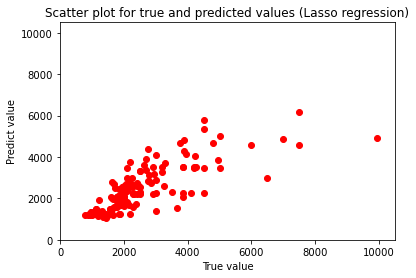

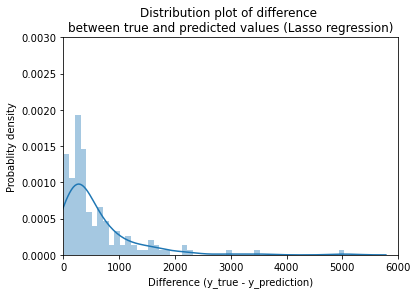




 The following graphs are for report (no title)


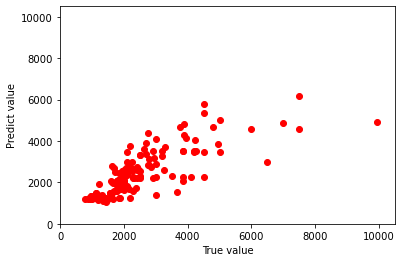

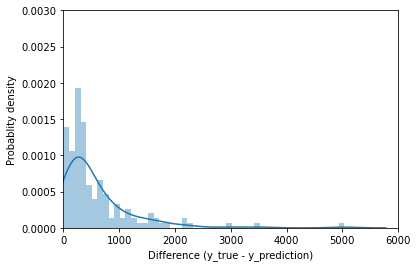

In [8]:
# Evaluate Lasso Model

# Baesd on previous test, we choose alpha=20 for Lasso Regression model
model = Lasso(alpha = 20)
model.fit(x_train, y_train)
ypred = model.predict(x_test)
ytest = np.array(y_test)

# Sometimes, the model predicts ridiculous number for some data
# Therefore, delete those wired predictions and then evaluate the result
wired_pred_index = []
for i, pred in enumerate(ypred):
    if pred > 50000 or pred < -10000:
        wired_pred_index.append(i)
ypred = np.delete(ypred, wired_pred_index) # delete wired prediction
ytest = np.delete(ytest, wired_pred_index) # delete the corresponding data from test set


# Compute MAE
absolute = np.absolute(ytest - ypred)
mae = np.average(absolute)

# Compute MSE and RMSE
square = (ytest - ypred) ** 2
mse = np.average(square)
rmse = np.sqrt(mse)

# Print results
print("=======================================")
print("Lasso regression model")
print("=======================================")
print("MAE:  ", mae)
print("MSE:  ", mse)
print("RMSE:  ", rmse)

dif = np.absolute(ytest - ypred)
dif_ave = np.average(dif)
dif_std = np.std(dif)
print("Difference (y_true - y_prediction): ", dif_ave, u"\u00B1", dif_std)

# Plot graph
plt.figure(figsize = (6, 4))
plt.scatter(ytest, ypred,  color='red')
plt.title('Scatter plot for true and predicted values (Lasso regression)')
plt.xlabel("True value")
plt.ylabel("Predict value")
plt.xlim([0, 10500])
plt.ylim([0, 10500])
plt.show()

plt.figure(figsize = (6, 4))
sns.distplot(dif, bins=50)
plt.title('Distribution plot of difference \nbetween true and predicted values (Lasso regression)')
plt.xlabel("Difference (y_true - y_prediction)")
plt.ylabel("Probablity density")
plt.xlim([0, 6000])
plt.ylim([0, 0.003])
plt.show()

print("\n\n\n The following graphs are for report (no title)")

plt.figure(figsize = (6, 4))
plt.scatter(ytest, ypred,  color='red')
plt.xlabel("True value")
plt.ylabel("Predict value")
plt.xlim([0, 10500])
plt.ylim([0, 10500])
plt.show()

plt.figure(figsize = (6, 4))
sns.distplot(dif, bins=50)
plt.xlabel("Difference (y_true - y_prediction)")
plt.ylabel("Probablity density")
plt.xlim([0, 6000])
plt.ylim([0, 0.003])
plt.show()

C:  1 mean MAE:  869.9479950917715 std MAE:  89.12319893432343
C:  5 mean MAE:  816.5423454513963 std MAE:  86.13058969082545
C:  10 mean MAE:  767.9984735808293 std MAE:  82.43859553681762
C:  50 mean MAE:  655.9271959732797 std MAE:  79.50199843596192
C:  100 mean MAE:  616.8952489461205 std MAE:  82.52763761587256
C:  500 mean MAE:  551.5323041525239 std MAE:  81.18583462757721
C:  1000 mean MAE:  537.8263243666979 std MAE:  76.13556065139291
C:  5000 mean MAE:  544.1921440481515 std MAE:  81.08031098821107
C:  10000 mean MAE:  554.7920814850587 std MAE:  83.29176678703953
C:  50000 mean MAE:  614.4870827525588 std MAE:  99.04255338984112
C:  100000 mean MAE:  679.9820319537457 std MAE:  96.90798101715812


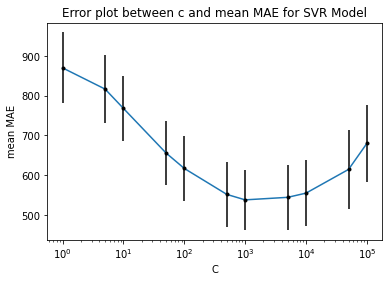




 The following graphs are for report (no title)


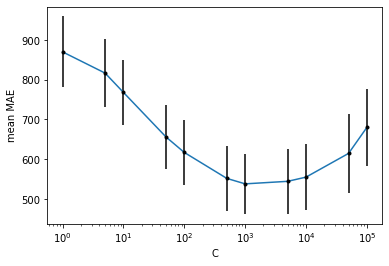

In [9]:
# Find a best C for SVR Model with rbf kernel

# Decide the range of alphas we are going to test
C = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]

# Prepare list to save the errors
mean_mae=[]
std_mae=[]

# Find the best alpha useing cross-validation
folds = KFold(n_splits =8)
for c in C:
    temp_mae = []
    for train,test in folds.split(x_train):

        # change the type of the training data, otherwise some problems will happen
        temp_xtrain = np.array(x_train)
        temp_ytrain = np.array(y_train)
        
        # Train the model
        model = SVR(kernel = 'rbf', C = c, epsilon = 0.1)
        model.fit(temp_xtrain[train], temp_ytrain[train])
        ypred = model.predict(temp_xtrain[test])
        ytest = np.array(temp_ytrain[test])
        
        # Sometimes, the model predicts ridiculous number for some data
        # Therefore, delete those wired predictions and then evaluate the result
        wired_pred_index = []
        for i, pred in enumerate(ypred):
            if pred > 50000 or pred < -10000:
                wired_pred_index.append(i)
        ypred = np.delete(ypred, wired_pred_index) # delete wired prediction
        ytest = np.delete(ytest, wired_pred_index) # delete the corresponding data from test set
        
        # Compute MAE
        absolute = np.absolute(ytest - ypred)
        mae = np.average(absolute)
        temp_mae.append(mae)
    
    # Record the result of an alpha
    mean_mae.append(np.array(temp_mae).mean())
    std_mae.append(np.array(temp_mae).std())

# Print the mean of RMSE and standard deviation of RMSE
for c, mean, std in zip(C, mean_mae, std_mae):
    print("C: ", c, "mean MAE: ", mean , "std MAE: ", std)

# Plot graph
plt.figure(figsize = (6, 4))
plt.plot(C, mean_mae)
plt.errorbar(C, mean_mae, yerr=std_mae, fmt='ok', markersize=3);
plt.xlabel("C")
plt.ylabel("mean MAE")
plt.xscale("log")
plt.title("Error plot between c and mean MAE for SVR Model")
plt.show()    

print("\n\n\n The following graphs are for report (no title)")

plt.figure(figsize = (6, 4))
plt.plot(C, mean_mae)
plt.errorbar(C, mean_mae, yerr=std_mae, fmt='ok', markersize=3);
plt.xlabel("C")
plt.ylabel("mean MAE")
plt.xscale("log")
plt.show()    

Epsilon:  0.0001 mean MAE:  537.8270231032177 std MAE:  76.13398126556324
Epsilon:  0.001 mean MAE:  537.8270192850089 std MAE:  76.13397632106813
Epsilon:  0.01 mean MAE:  537.8269524804548 std MAE:  76.13413025309957
Epsilon:  0.1 mean MAE:  537.8263243666979 std MAE:  76.13556065139291
Epsilon:  1 mean MAE:  537.8241844391741 std MAE:  76.14427041455787
Epsilon:  10 mean MAE:  537.8996515308723 std MAE:  76.49976490248284


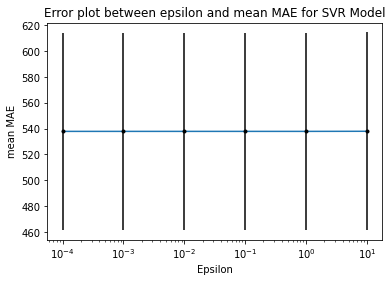




 The following graphs are for report (no title)


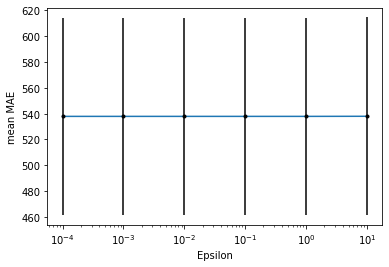

In [10]:
# Find a best epsilon for SVR Model with rbf kernel
# Based on previous result, we choose C=1000

# Decide the range of alphas we are going to test
epsilons = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Prepare list to save the errors
mean_mae=[]
std_mae=[]

# Find the best alpha useing cross-validation
folds = KFold(n_splits =8)
for e in epsilons:
    temp_mae = []
    for train,test in folds.split(x_train):

        # change the type of the training data, otherwise some problems will happen
        temp_xtrain = np.array(x_train)
        temp_ytrain = np.array(y_train)
        
        # Train the model
        model = SVR(kernel = 'rbf', C = 1000, epsilon = e)
        model.fit(temp_xtrain[train], temp_ytrain[train])
        ypred = model.predict(temp_xtrain[test])
        ytest = np.array(temp_ytrain[test])
        
        # Sometimes, the model predicts ridiculous number for some data
        # Therefore, delete those wired predictions and then evaluate the result
        wired_pred_index = []
        for i, pred in enumerate(ypred):
            if pred > 50000 or pred < -10000:
                wired_pred_index.append(i)
        ypred = np.delete(ypred, wired_pred_index) # delete wired prediction
        ytest = np.delete(ytest, wired_pred_index) # delete the corresponding data from test set
        
        # Compute MAE
        absolute = np.absolute(ytest - ypred)
        mae = np.average(absolute)
        temp_mae.append(mae)
    
    # Record the result of an alpha
    mean_mae.append(np.array(temp_mae).mean())
    std_mae.append(np.array(temp_mae).std())

# Print the mean of RMSE and standard deviation of RMSE
for e, mean, std in zip(epsilons, mean_mae, std_mae):
    print("Epsilon: ", e, "mean MAE: ", mean , "std MAE: ", std)

# Plot graph
plt.figure(figsize = (6, 4))
plt.plot(epsilons, mean_mae)
plt.errorbar(epsilons, mean_mae, yerr=std_mae, fmt='ok', markersize=3);
plt.xlabel("Epsilon")
plt.ylabel("mean MAE")
plt.xscale("log")
plt.title("Error plot between epsilon and mean MAE for SVR Model")
plt.show()    

print("\n\n\n The following graphs are for report (no title)")

plt.figure(figsize = (6, 4))
plt.plot(epsilons, mean_mae)
plt.errorbar(epsilons, mean_mae, yerr=std_mae, fmt='ok', markersize=3);
plt.xlabel("Epsilon")
plt.ylabel("mean MAE")
plt.xscale("log")
plt.show()    

SVR model
MAE:   514.8627977027394
MSE:   815178.3896258818
RMSE:   902.8722997334019
Difference (y_true - y_prediction):  514.8627977027394 ± 741.6836853858861


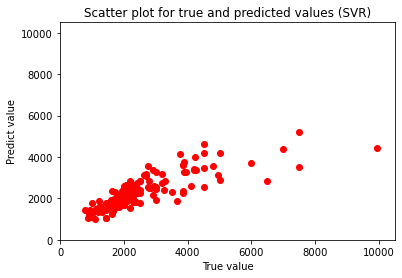

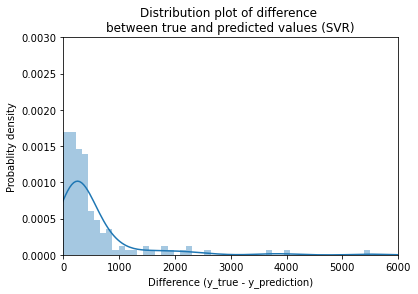




 The following graphs are for report (no title)


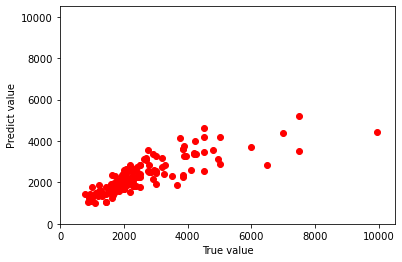

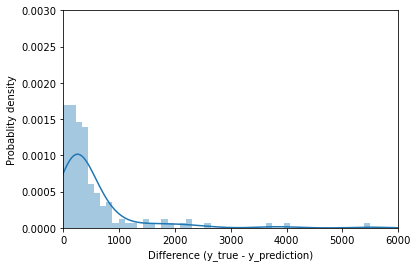

In [11]:
# Evaluate SVR Model

# Baesd on previous test, we choose C=1000 and epsilon=1 for SVR model
model = SVR(kernel = 'rbf', C = 1000, epsilon = 1)
model.fit(x_train, y_train)
ypred = model.predict(x_test)
ytest = np.array(y_test)

# Sometimes, the model predicts ridiculous number for some data
# Therefore, delete those wired predictions and then evaluate the result
wired_pred_index = []
for i, pred in enumerate(ypred):
    if pred > 50000 or pred < -10000:
        wired_pred_index.append(i)
ypred = np.delete(ypred, wired_pred_index) # delete wired prediction
ytest = np.delete(ytest, wired_pred_index) # delete the corresponding data from test set

# Compute MAE
absolute = np.absolute(ytest - ypred)
mae = np.average(absolute)

# Compute MSE and RMSE
square = (ytest - ypred) ** 2
mse = np.average(square)
rmse = np.sqrt(mse)

# Print results
print("=======================================")
print("SVR model")
print("=======================================")
print("MAE:  ", mae)
print("MSE:  ", mse)
print("RMSE:  ", rmse)

dif = np.absolute(ytest - ypred)
dif_ave = np.average(dif)
dif_std = np.std(dif)
print("Difference (y_true - y_prediction): ", dif_ave, u"\u00B1", dif_std)

# Plot graph
plt.figure(figsize = (6, 4))
plt.scatter(ytest, ypred,  color='red')
plt.title('Scatter plot for true and predicted values (SVR)')
plt.xlabel("True value")
plt.ylabel("Predict value")
plt.xlim([0, 10500])
plt.ylim([0, 10500])
plt.show()

plt.figure(figsize = (6, 4))
sns.distplot(dif,bins=50)
plt.title('Distribution plot of difference \nbetween true and predicted values (SVR)')
plt.xlabel("Difference (y_true - y_prediction)")
plt.ylabel("Probablity density")
plt.xlim([0, 6000])
plt.ylim([0, 0.003])
plt.show()

print("\n\n\n The following graphs are for report (no title)")

plt.figure(figsize = (6, 4))
plt.scatter(ytest, ypred,  color='red')
plt.xlabel("True value")
plt.ylabel("Predict value")
plt.xlim([0, 10500])
plt.ylim([0, 10500])
plt.show()

plt.figure(figsize = (6, 4))
sns.distplot(dif,bins=50)
plt.xlabel("Difference (y_true - y_prediction)")
plt.ylabel("Probablity density")
plt.xlim([0, 6000])
plt.ylim([0, 0.003])
plt.show()

In [12]:
# Change data type to numpy.array for XGBoost
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


depth:  1 mean MAE:  686.9755294799804 std MAE:  99.95134831800904
depth:  2 mean MAE:  623.2676185319231 std MAE:  98.47025430085418
depth:  3 mean MAE:  588.0001052471539 std MAE:  102.41723696331071
depth:  4 mean MAE:  587.0305779177004 std MAE:  97.25931693523904
depth:  5 mean MAE:  577.3214035364099 std MAE:  106.5357807057261
depth:  6 mean MAE:  586.2886713911176 std MAE:  102.75233739859246
depth:  7 mean MAE:  587.4263383772567 std MAE:  109.11886725686175
depth:  8 mean MAE:  599.9425863564982 std MAE:  104.50094143538846
depth:  9 mean MAE:  595.9274824276486 std MAE:  113.69104518998076
depth:  10 mean MAE:  602.7264541351043 std MAE:  110.91658203916091
depth:  11 mean MAE:  607.4405679280048 std MAE:  108.63819206736311
depth:  12 mean MAE:  603.9966634980623 std MAE:  106.52840372743447
depth:  13 mean MAE:  600.2454698291126 std MAE:  111.78583465629582
depth:  14 mean MAE:  600.9005339930079 std MAE:  108.2743437133642
depth:  15 mean MAE:  605.8769621221869 std MAE:

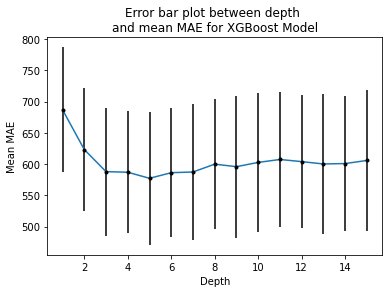




 The following graphs are for report (no title)


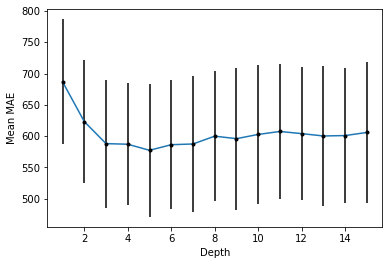

In [13]:
# Test various max_depth for XGBoost

depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Prepare list to save the errors
mean_mae=[]
std_mae=[]

folds = KFold(n_splits =8)

for d in depths:
    temp_mae = []
        
    for train,test in folds.split(x_train):
        
        Matrix_train = xg.DMatrix(data = x_train[train], label = y_train[train])
        Matrix_test = xg.DMatrix(data = x_train[test], label = y_train[test])
        
        # Train the model
        model=xg.train(params = { "max_depth": d}, dtrain = Matrix_train, num_boost_round = 12)
        ypred= model.predict(Matrix_test)
        ytest = np.array(y_train[test])
        
        # Sometimes, the model predicts ridiculous number for some data
        # Therefore, delete those wired predictions and then evaluate the result
        wired_pred_index = []
        for i, pred in enumerate(ypred):
            if pred > 50000 or pred < -10000:
                wired_pred_index.append(i)
        ypred = np.delete(ypred, wired_pred_index) # delete wired prediction
        ytest = np.delete(ytest, wired_pred_index) # delete the corresponding data from test set

        # Compute MAE
        absolute = np.absolute(ytest - ypred)
        mae = np.average(absolute)
        temp_mae.append(mae)
    
    # Record the result of an alpha
    mean_mae.append(np.array(temp_mae).mean())
    std_mae.append(np.array(temp_mae).std())

# Print the mean of RMSE and standard deviation of RMSE
for d, mean, std in zip(depths, mean_mae, std_mae):
    print("depth: ", d, "mean MAE: ", mean , "std MAE: ", std)

# Plot graph
plt.figure(figsize = (6, 4))
plt.plot(depths, mean_mae)
plt.errorbar(depths, mean_mae, yerr=std_mae, fmt='ok', markersize=3);
plt.xlabel("Depth")
plt.ylabel("Mean MAE")
plt.title("Error bar plot between depth \nand mean MAE for XGBoost Model")
plt.show()    

print("\n\n\n The following graphs are for report (no title)")

plt.figure(figsize = (6, 4))
plt.plot(depths, mean_mae)
plt.errorbar(depths, mean_mae, yerr=std_mae, fmt='ok', markersize=3);
plt.xlabel("Depth")
plt.ylabel("Mean MAE")
plt.show()   

Boost round:  1 mean MAE:  1769.2016107892562 std MAE:  109.54792196086574
Boost round:  2 mean MAE:  1271.683496715099 std MAE:  104.77351672918148
Boost round:  3 mean MAE:  934.9404703473615 std MAE:  99.92004111242159
Boost round:  4 mean MAE:  743.6805492545463 std MAE:  95.077641466579
Boost round:  5 mean MAE:  642.6791356404622 std MAE:  100.3578168521036
Boost round:  6 mean MAE:  597.6693934906281 std MAE:  108.64213434884672
Boost round:  7 mean MAE:  576.0377448691979 std MAE:  112.47391648979998
Boost round:  8 mean MAE:  570.1584858772346 std MAE:  113.3045719240678
Boost round:  9 mean MAE:  570.4918553037901 std MAE:  111.04073913605615
Boost round:  10 mean MAE:  573.0140278776702 std MAE:  108.88527054535241
Boost round:  11 mean MAE:  575.146159885166 std MAE:  104.53272489405047
Boost round:  12 mean MAE:  577.3214035364099 std MAE:  106.5357807057261
Boost round:  13 mean MAE:  580.5838024902343 std MAE:  106.23383587949237
Boost round:  14 mean MAE:  583.864452575

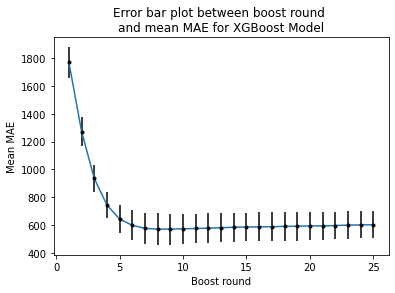




 The following graphs are for report (no title)


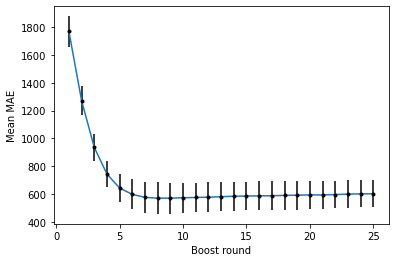

In [14]:
# Test various num_boost_round for XGBoost

rounds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

# Prepare list to save the errors
mean_mae=[]
std_mae=[]

folds = KFold(n_splits =8)

for r in rounds:
    temp_mae = []
    
    for train,test in folds.split(x_train):
        
        Matrix_train = xg.DMatrix(data = x_train[train], label = y_train[train])
        Matrix_test = xg.DMatrix(data = x_train[test], label = y_train[test])
        
        # Train the model
        model=xg.train(params = { "max_depth": 5}, dtrain = Matrix_train, num_boost_round = r)
        ypred= model.predict(Matrix_test)
        ytest = np.array(y_train[test])
        
        # Sometimes, the model predicts ridiculous number for some data
        # Therefore, delete those wired predictions and then evaluate the result
        wired_pred_index = []
        for i, pred in enumerate(ypred):
            if pred > 50000 or pred < -10000:
                wired_pred_index.append(i)
        ypred = np.delete(ypred, wired_pred_index) # delete wired prediction
        ytest = np.delete(ytest, wired_pred_index) # delete the corresponding data from test set
        
        # Compute MAE
        absolute = np.absolute(ytest - ypred)
        mae = np.average(absolute)
        temp_mae.append(mae)

    # Record the result of an alpha
    mean_mae.append(np.array(temp_mae).mean())
    std_mae.append(np.array(temp_mae).std())

# Print the mean of RMSE and standard deviation of RMSE
for r, mean, std in zip(rounds, mean_mae, std_mae):
    print("Boost round: ", r, "mean MAE: ", mean , "std MAE: ", std)

# Plot graph
plt.figure(figsize = (6, 4))
plt.plot(rounds, mean_mae)
plt.errorbar(rounds, mean_mae, yerr=std_mae, fmt='ok', markersize=3);
plt.xlabel("Boost round")
plt.ylabel("Mean MAE")
plt.title("Error bar plot between boost round \nand mean MAE for XGBoost Model")
plt.show() 

print("\n\n\n The following graphs are for report (no title)")

plt.figure(figsize = (6, 4))
plt.plot(rounds, mean_mae)
plt.errorbar(rounds, mean_mae, yerr=std_mae, fmt='ok', markersize=3);
plt.xlabel("Boost round")
plt.ylabel("Mean MAE")
plt.show() 

XGBoost regression model
MAE:   525.2524772135416
MSE:   747381.3958581447
RMSE:   864.5122300223085
Difference (y_true - y_prediction):  525.2524772135416 ± 686.6521907335493


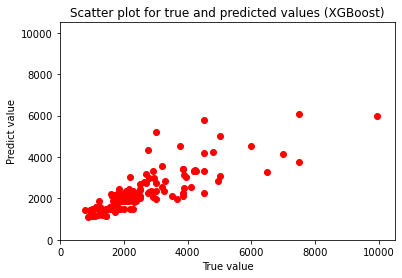

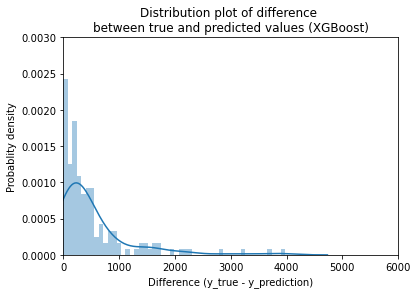




 The following graphs are for report (no title)


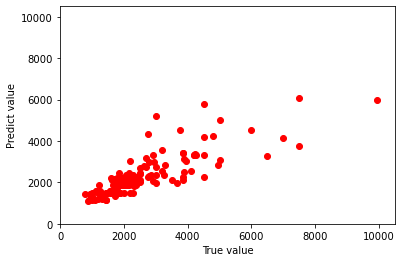

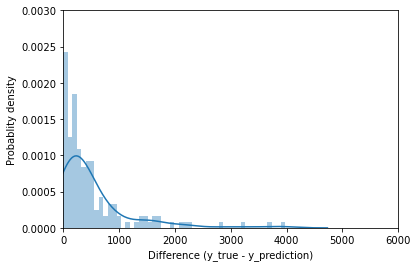

In [15]:
# Evaluate XGBoost Model
# Based on previous experiment, we choose max_depth = 5, num_boost_round = 8

Matrix_train = xg.DMatrix(data = x_train, label = y_train)
Matrix_test = xg.DMatrix(data = x_test, label = y_test)

model = xg.train(params = { "max_depth": 5}, dtrain = Matrix_train, num_boost_round = 8)
ypred = model.predict(Matrix_test)
ytest = np.array(y_test)

# Sometimes, the model predicts ridiculous number for some data
weird_pred_index = []
for i, pred in enumerate(ypred):
    if pred > 50000 or pred < -10000:
        weird_pred_index.append(i)
ypred = np.delete(ypred, weird_pred_index) # delete wired prediction
ytest = np.delete(ytest, weird_pred_index) # delete the corresponding data from test set

# Compute MAE
absolute = np.absolute(ytest - ypred)
mae = np.average(absolute)

# Compute MSE and RMSE
square = (ytest - ypred) ** 2
mse = np.average(square)
rmse = np.sqrt(mse)

# Print results
print("=======================================")
print("XGBoost regression model")
print("=======================================")
print("MAE:  ", mae)
print("MSE:  ", mse)
print("RMSE:  ", rmse)

dif = np.absolute(ytest - ypred)
dif_ave = np.average(dif)
dif_std = np.std(dif)
print("Difference (y_true - y_prediction): ", dif_ave, u"\u00B1", dif_std)

# Plot graph
plt.figure(figsize = (6, 4))
plt.scatter(ytest, ypred,  color='red')
plt.title('Scatter plot for true and predicted values (XGBoost)')
plt.xlabel("True value")
plt.ylabel("Predict value")
plt.xlim([0, 10500])
plt.ylim([0, 10500])
plt.show()

plt.figure(figsize = (6, 4))
sns.distplot(dif,bins=50)
plt.title('Distribution plot of difference \nbetween true and predicted values (XGBoost)')
plt.xlabel("Difference (y_true - y_prediction)")
plt.ylabel("Probablity density")
plt.xlim([0, 6000])
plt.ylim([0, 0.003])
plt.show()

print("\n\n\n The following graphs are for report (no title)")

plt.figure(figsize = (6, 4))
plt.scatter(ytest, ypred,  color='red')
plt.xlabel("True value")
plt.ylabel("Predict value")
plt.xlim([0, 10500])
plt.ylim([0, 10500])
plt.show()

plt.figure(figsize = (6, 4))
sns.distplot(dif,bins=50)
plt.xlabel("Difference (y_true - y_prediction)")
plt.ylabel("Probablity density")
plt.xlim([0, 6000])
plt.ylim([0, 0.003])
plt.show()